## The intuition behind the Perceptron algorithm.

El algoritmo de Perceptrón se inspira en el funcionamiento simplificado de las neuronas cerebrales. Toma entradas y asigna pesos a cada una, realiza una combinación lineal de estas entradas ponderadas y, luego, aplica una función de activación para producir una salida binaria. Durante el aprendizaje, ajusta los pesos según datos de entrenamiento para mejorar sus predicciones, y este proceso se repite durante un número de iteraciones. Aunque simple, el Perceptrón es la base de los modelos de aprendizaje automático y sienta las bases para redes neuronales más complejas.

## Algorithm pseudocode

This pseudocode describes the basic training process of a Perceptron. In each epoch, it iterates through the training examples, calculates the Perceptron's output, evaluates the error, and adjusts the weights and the threshold to improve predictions. This process is repeated for a predetermined number of epochs or until the Perceptron achieves a desired classification performance.

    Initialize weights w and threshold θ randomly or to zero
    Define the learning rate η


      For each epoch (iteration):
      For each training example (input x, label y):

        Calculate the weighted input z as the sum of (x * w)
        Apply the activation function: if z > θ, then output = 1, otherwise output = 0
        Calculate the error: error = y - output
        Update weights and the threshold:
            w = w + η * error * x
            θ = θ + η * error


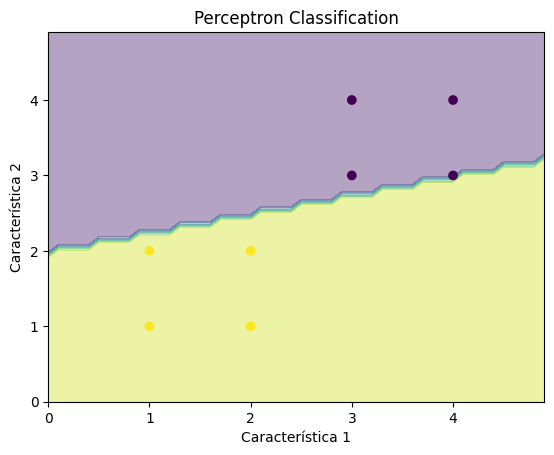

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Perceptron Class
class Perceptron:
    def __init__(self, input_size, learning_rate=0.1, num_epochs=100):
        self.weights = np.zeros(input_size + 1)
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs

    def predict(self, inputs):
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]
        return 1 if summation > 0 else 0

    def train(self, training_data, labels):
        for _ in range(self.num_epochs):
            for inputs, label in zip(training_data, labels):
                prediction = self.predict(inputs)
                self.weights[1:] += self.learning_rate * (label - prediction) * inputs
                self.weights[0] += self.learning_rate * (label - prediction)

# Training data (examples of two features)
training_data = np.array([[1, 1], [2, 1], [2, 2], [1, 2], [3, 3], [4, 3], [4, 4], [3, 4]])
labels = np.array([1, 1, 1, 1, 0, 0, 0, 0])  # Simple ranking based on position

#Create and train the perceptron
perceptron = Perceptron(input_size=2)
perceptron.train(training_data, labels)

# Generate data for visualization
x_min, x_max = min(training_data[:, 0]) - 1, max(training_data[:, 0]) + 1
y_min, y_max = min(training_data[:, 1]) - 1, max(training_data[:, 1]) + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = []
for i in range(len(xx)):
    for j in range(len(yy)):
        Z.append(perceptron.predict([xx[i][j], yy[i][j]]))
Z = np.array(Z).reshape(xx.shape)

# Graph the results
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(training_data[:, 0], training_data[:, 1], c=labels)
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.title('Perceptron Classification')
plt.show()


This code trains a Perceptron with training data representing two separate classes in two-dimensional space and then plots the Perceptron's decision boundary. The violet and yellow dots represent the two classes, and the shaded area shows the Perceptron classification region.

## Loss function + Optimization function identification.

The Perceptron does not use a sophisticated loss function or optimization process. Instead, it adjusts its weights in a simple way to minimize classification errors during training. More advanced models, such as neural networks, use loss and optimization functions to more precisely tune parameters in supervised learning problems. The Perceptron is an introductory model that lacks these more complex features.

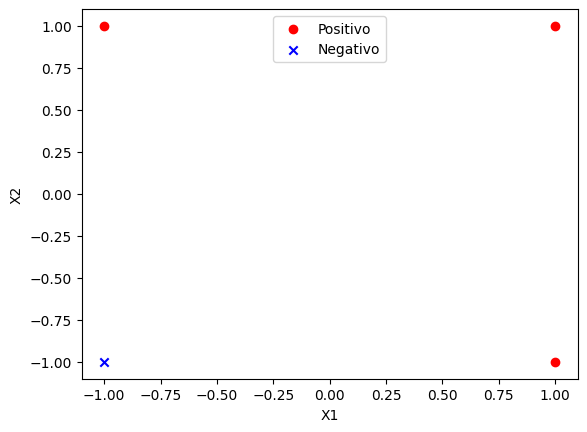

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
class Perceptron(object):
    '''Clasificador perceptron.'''
    def __init__(self, eta = 0.5, n_iter = 50, random_state = 1):
      self.eta = eta  #Tasa de aprendizaje (entre 0.0 y 1.0)
      self.n_iter = n_iter  # nimero de veces qie va a pasar el conjunto de datos
      self.random_state = random_state  #Semilla del generador de numero aleatorios

    def fit(self, X, y):

      rgen = np.random.RandomState(self.random_state)   # Generamos numero aleatorios
      self.w_ = rgen.normal(loc = 0.0, scale = 0.01, size = 1 + X.shape[1])  # numero aleatorios con dev est 0.01
      #self.w_ = [0,0,0] #inicializando pesos en cero
      self.errores_ = []  #lista vacia para los errores
      print('Pesos iniciales', self.w_)

      for _ in range(self.n_iter): #ciclo que se repite segun el numero de iteraciones
          errores = 0
          for xi, etiqueta in zip(X, y): # ciclo que se repite segun el numero de muestras
            actualizacion = self.eta * (etiqueta - self.predice(xi))
            self.w_[1:] += actualizacion * xi
            self.w_[0] += actualizacion
            errores += int(actualizacion != 0)
          self.errores_.append(errores)
          print('Pesos en epoch', _ , ':', self.w_)
      return self

    def entrada_neta(self, X):
      'Calculo de la entrada neta'
      return np.dot(X, self.w_[1:]) + self.w_[0]

    def predice(self, X):
      'Etiqueta de clase de retorno despues del paso unitario'
      return np.where(self.entrada_neta(X) >= 0.0, 1, -1)

datos = [[1,1], [1,-1], [-1,1], [-1,-1]]
X = np.array(datos)
y = [1, 1, 1, -1]

#visualizar los datos
plt.scatter(X[0:3, 0], X[0:3, 1], color = 'red', marker = 'o', label = 'Positivo')
plt.scatter(X[3, 0], X[3, 1], color = 'blue', marker = 'x', label = 'Negativo')

plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(loc = 'upper center')

plt.show()